# 2) Cleaning and modeling
## 2.1) Import Dataset we scrapped from Reddit with 6 topics:

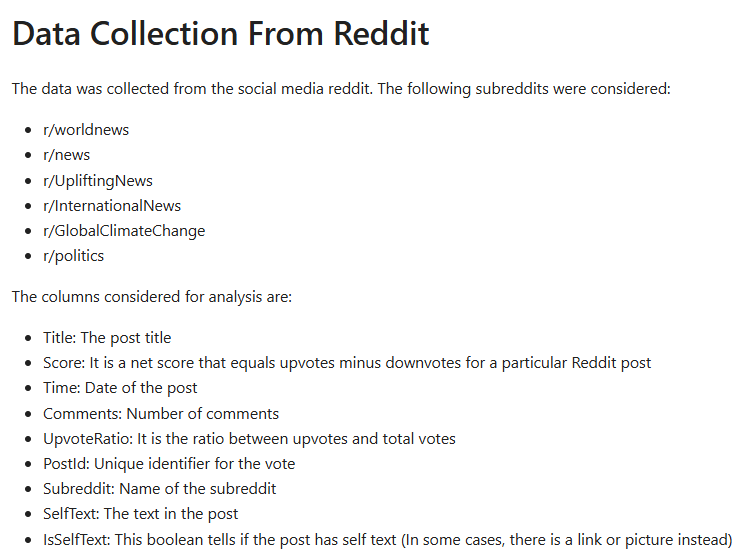

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/news.csv')

In [3]:
df.head(5)

,Title,Score,Time,Comments,UpvoteRatio,PostId,Subreddit,SelfText,IsSelfText
0,An anti-gay Hungarian politician has resigned ...,204544,1.606847e+09,8392,0.93,k4qide,worldnews,NaN,False
1,Trump Impeached for Abuse of Power,202899,1.576719e+09,20000,0.88,eclwg9,worldnews,NaN,False
2,Vladimir Putin's black belt revoked by interna...,200152,1.646081e+09,6904,0.89,t3pgaz,worldnews,NaN,False
3,"Two weeks before his inauguration, Donald J. T...",189351,1.531966e+09,18004,0.84,901p5f,worldnews,NaN,False
4,"Queen Elizabeth II has died, Buckingham Palace...",189029,1.662658e+09,16452,0.79,x96k3v,worldnews,NaN,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10363 entries, 0 to 10362
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10363 non-null  object 
 1   Score        10363 non-null  int64  
 2   Time         10363 non-null  float64
 3   Comments     10363 non-null  int64  
 4   UpvoteRatio  10363 non-null  float64
 5   PostId       10363 non-null  object 
 6   Subreddit    10363 non-null  object 
 7   SelfText     265 non-null    object 
 8   IsSelfText   10363 non-null  bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 657.9+ KB


In [5]:
df.isnull().sum()

Title              0
Score              0
Time               0
Comments           0
UpvoteRatio        0
PostId             0
Subreddit          0
SelfText       10098
IsSelfText         0
dtype: int64

In [6]:
data = df[['Title']]
data['index'] = data.index
documents = data
documents

C:\Users\darli\AppData\Local\Temp\ipykernel_29592\616288559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'] = data.index


,Title,index
0,An anti-gay Hungarian politician has resigned ...,0
1,Trump Impeached for Abuse of Power,1
2,Vladimir Putin's black belt revoked by interna...,2
3,"Two weeks before his inauguration, Donald J. T...",3
4,"Queen Elizabeth II has died, Buckingham Palace...",4
...,...,...
10358,RFK Jr. had a ‘visceral’ reaction to tear-down...,10358
10359,Meet the Kentucky Republican Who Beat AIPAC: S...,10359
10360,Robert De Niro calls Trump a 'clown' outside t...,10360
10361,Skyrocketing rents and home prices may be pivo...,10361


In [7]:
print(len(documents))
documents[:5]

10363


,Title,index
0,An anti-gay Hungarian politician has resigned ...,0
1,Trump Impeached for Abuse of Power,1
2,Vladimir Putin's black belt revoked by interna...,2
3,"Two weeks before his inauguration, Donald J. T...",3
4,"Queen Elizabeth II has died, Buckingham Palace...",4


## 2.2) Data Preprocessing and cleaning

a. Tokenization

b. Remove words with 3 characters or less

c. Stopword removal

d. Lemmatization

e. Stemmers

In [8]:
import os
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer, word_tokenize
import numpy as np
import nltk
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import gensim.corpora as corpora
#from gensim.models.wrappers import LdaMallet

In [9]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\darli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
# In these 2 functions we made all these steps:
#a. Tokenization
#b. Remove words with 3 characters or less
#c. Stopword removal
#d. Lemmatization
#e. Stemmers

def lemmatize_stemming(text):
  stemmer = PorterStemmer()
  # print("Text: ", text)

  lem_verb = WordNetLemmatizer().lemmatize(text, pos='v')
  # print("Lem verb: ", lem_verb)

  return stemmer.stem(lem_verb)


def preprocess(text):
  results = []

  for token in simple_preprocess(text):                          #by using simple_preprocess we made tokenization
    if (token not in STOPWORDS) and (len(token) > 3):            #then at the same time we remove the stop words we also filter any word less than 3 ch
      results.append(lemmatize_stemming(token))                  #finally re-use the previous function, which makes a lemmatizer first and then a stemming

  return results

In [11]:
doc_sample = documents[documents['index']==0].values[0][0]

print("Original Document: \n", doc_sample)
print(word_tokenize(doc_sample))

print("Processed Document: ")
print(preprocess(doc_sample))

Original Document: 
 An anti-gay Hungarian politician has resigned after being caught by police fleeing a 25-man orgy through a window
['An', 'anti-gay', 'Hungarian', 'politician', 'has', 'resigned', 'after', 'being', 'caught', 'by', 'police', 'fleeing', 'a', '25-man', 'orgy', 'through', 'a', 'window']
Processed Document: 
['anti', 'hungarian', 'politician', 'resign', 'catch', 'polic', 'flee', 'orgi', 'window']


In [12]:
processed_doc = documents.Title.map(preprocess)
processed_doc[:10]

0    [anti, hungarian, politician, resign, catch, p...
1                        [trump, impeach, abus, power]
2    [vladimir, putin, black, belt, revok, intern, ...
3    [week, inaugur, donald, trump, show, highli, c...
4    [queen, elizabeth, die, buckingham, palac, ann...
5    [senior, russian, offici, sign, open, letter, ...
6    [reject, evacu, offer, zelenski, say, need, an...
7    [anonym, leak, databas, russian, ministri, def...
8    [terabyt, leak, panamanian, shell, compani, da...
9    [kyiv, consensu, disconnect, russia, swift, ac...
Name: Title, dtype: object

### 2.2.1) Including Bigrams and Trigrams

In [13]:
print(processed_doc[0][0:20])

['anti', 'hungarian', 'politician', 'resign', 'catch', 'polic', 'flee', 'orgi', 'window']


In [14]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(processed_doc, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[processed_doc], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(processed_doc)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])
print(data_bigrams_trigrams[:5])

['anti', 'hungarian', 'politician', 'resign', 'catch', 'polic', 'flee', 'orgi', 'window']
[['anti', 'hungarian', 'politician', 'resign', 'catch', 'polic', 'flee', 'orgi', 'window'], ['trump', 'impeach', 'abus', 'power'], ['vladimir_putin', 'black', 'belt', 'revok', 'intern', 'taekwondo', 'organ'], ['week', 'inaugur', 'donald', 'trump', 'show', 'highli', 'classifi', 'intellig', 'indic', 'presid', 'vladimir_putin', 'russia', 'person', 'order', 'complex', 'cyberattack', 'sway', 'american', 'elect'], ['queen', 'elizabeth', 'die', 'buckingham', 'palac', 'announc']]


In this case "vladimir_putin" is a bigram founded it, we can make a search quickly for all other bigram/trigrams by just finding "_"

## 2.3) Creating the Dictionary

## Bag of words on dataset

In this case we are not going to use Bag of words

## TF-IDF

In [15]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

dictonary = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [dictonary.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=dictonary)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow


In [16]:
print (corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


## 2.4) Building the Topic Model (LDA Model)

We are going to start with 5 topics

### 2.4.1) Building the LDA Model

In [19]:
lda_model = gensim.models.LdaMulticore(corpus,
                                       num_topics=5,
                                       id2word=dictonary,
                                       passes=2,
                                       workers=2
                                       )

### 2.4.2) View the Topics in LDA Model

In [20]:
for id, topic in lda_model.print_topics():
  print('Topic: {} \nWords: {}'.format(id, topic))

Topic: 0 
Words: 0.014*"climat" + 0.012*"trump" + 0.012*"chang" + 0.008*"warm" + 0.008*"year" + 0.007*"global" + 0.006*"emiss" + 0.006*"biden" + 0.005*"elect" + 0.005*"carbon"
Topic: 1 
Words: 0.023*"climat" + 0.017*"chang" + 0.007*"say" + 0.007*"biden" + 0.005*"report" + 0.004*"american" + 0.004*"claim" + 0.004*"trump" + 0.004*"scientist" + 0.004*"year"
Topic: 2 
Words: 0.022*"trump" + 0.009*"climat" + 0.008*"say" + 0.008*"israel" + 0.007*"state" + 0.007*"report" + 0.005*"polic" + 0.005*"warm" + 0.005*"year" + 0.004*"global"
Topic: 3 
Words: 0.016*"climat" + 0.013*"trump" + 0.009*"chang" + 0.009*"global" + 0.008*"studi" + 0.008*"gaza" + 0.007*"year" + 0.007*"israel" + 0.006*"presid" + 0.006*"studi_open_access"
Topic: 4 
Words: 0.014*"biden" + 0.012*"trump" + 0.011*"say" + 0.010*"gaza" + 0.009*"israel" + 0.007*"climat" + 0.007*"year" + 0.006*"global" + 0.006*"warm" + 0.005*"studi"


It means the top 10 keywords that contribute to this Topic 0 are: ‘climate’, ‘trump’, ‘year’.. and so on and the weight of ‘change’ on Topic 0 is 0.014.

The weights reflect how important a keyword is to that topic.

So here, we will manually choose the most appropriate name for every topic. For instance, for the 1st topic:

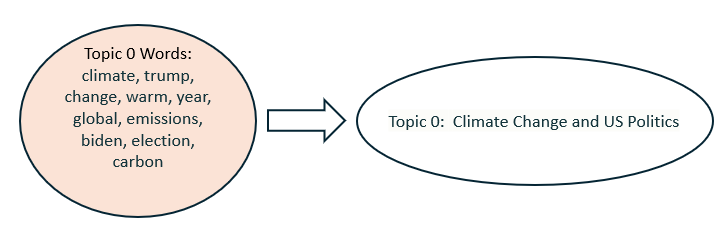

So, in summary, the names of the Topics:ictsonflicts
ies
rch Debates

* Topic 0: Climate Change and US Politics
* Topic 1: Climate Change Debates
* Topic 2: Trump Administration and Middle East
* Topic 3: Climate Studies and Middle East Conflicts
* Topic 4: US Politics and Middle East Conflicts

We have a trigram contribution in Topic 3's name, "Open Access Studies."

In [21]:
# Get topics in textual form from the trained LDA model
topics = lda_model.show_topics(num_topics=5, num_words=10)  # Adjust the number of topics and words as needed

# Print the topics
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.014*"climat" + 0.012*"trump" + 0.012*"chang" + 0.008*"warm" + 0.008*"year" + 0.007*"global" + 0.006*"emiss" + 0.006*"biden" + 0.005*"elect" + 0.005*"carbon"
Topic 1: 0.023*"climat" + 0.017*"chang" + 0.007*"say" + 0.007*"biden" + 0.005*"report" + 0.004*"american" + 0.004*"claim" + 0.004*"trump" + 0.004*"scientist" + 0.004*"year"
Topic 2: 0.022*"trump" + 0.009*"climat" + 0.008*"say" + 0.008*"israel" + 0.007*"state" + 0.007*"report" + 0.005*"polic" + 0.005*"warm" + 0.005*"year" + 0.004*"global"
Topic 3: 0.016*"climat" + 0.013*"trump" + 0.009*"chang" + 0.009*"global" + 0.008*"studi" + 0.008*"gaza" + 0.007*"year" + 0.007*"israel" + 0.006*"presid" + 0.006*"studi_open_access"
Topic 4: 0.014*"biden" + 0.012*"trump" + 0.011*"say" + 0.010*"gaza" + 0.009*"israel" + 0.007*"climat" + 0.007*"year" + 0.006*"global" + 0.006*"warm" + 0.005*"studi"


In [22]:
#Categorizing a Sample Test Document:

# 1. Preprocess the sample text
def preprocess_text(text):
    results = []
    for token in simple_preprocess(text):
        if (token not in STOPWORDS) and (len(token) > 3):
            results.append(lemmatize_stemming(token))
    return results

# Sample text to test
#sample_text = "Donald Trump has been convicted recently."
#sample_text = "Missing from Euro 2024, Russia are slowly disappearing from football altogether"
sample_text = "Trump draws the most confidence for his physical and mental fitness for office than Biden."

# Preprocess the sample text
processed_sample_text = preprocess_text(sample_text)

# 2. Convert the preprocessed sample text to Bag-of-Words representation
bow_sample_text = dictonary.doc2bow(processed_sample_text)

# 3. Infer the topic distribution of the sample text using the trained LDA model
sample_text_topics = lda_model.get_document_topics(bow_sample_text)

# Print the topic distribution for the sample text
print("Topic Distribution for the Sample Text:")
for topic in sample_text_topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic Distribution for the Sample Text:
Topic 0: 0.025402599945664406
Topic 1: 0.02529156394302845
Topic 2: 0.49604663252830505
Topic 3: 0.025656772777438164
Topic 4: 0.4276024401187897


sample_text has 49% of composition to Topic 2 and 42% composition to Topic 4

In [23]:
# Step 4: Get document-topic distributions for the first 10 documents
doc_topics = lda_model.get_document_topics(corpus[:10])

# Print document-topic distributions for the first 10 documents
for i, doc in enumerate(doc_topics):
    print(f"Document {i} topics: {doc}")

Document 0 topics: [(0, 0.020505957), (1, 0.020713393), (2, 0.91777766), (3, 0.020655373), (4, 0.020347653)]
Document 1 topics: [(0, 0.0417731), (1, 0.04189716), (2, 0.83410007), (3, 0.04152978), (4, 0.040699866)]
Document 2 topics: [(0, 0.70026016), (1, 0.025931561), (2, 0.02555653), (3, 0.22280993), (4, 0.025441801)]
Document 3 topics: [(0, 0.010215468), (1, 0.010235459), (2, 0.010209863), (3, 0.82334197), (4, 0.14599727)]
Document 4 topics: [(0, 0.028738396), (1, 0.88422), (2, 0.029047048), (3, 0.028899632), (4, 0.029094946)]
Document 5 topics: [(0, 0.010807351), (1, 0.010854078), (2, 0.010831783), (3, 0.29371235), (4, 0.67379445)]
Document 6 topics: [(0, 0.018820083), (1, 0.019121012), (2, 0.018711604), (3, 0.01870703), (4, 0.9246403)]
Document 7 topics: [(0, 0.029711539), (1, 0.029527409), (2, 0.029553002), (3, 0.029544268), (4, 0.8816638)]
Document 8 topics: [(0, 0.97131926)]
Document 9 topics: [(0, 0.022954155), (1, 0.02258325), (2, 0.90885466), (3, 0.023008293), (4, 0.022599617

"It means for Document 0, it is composed of 2% of Topic 0, 2% of Topic 1, 91% of Topic 2, 2% of Topic 3, and 2% of Topic 4."

### 2.4.3) Compute the Model Perplexity and Coherence Score


We have 2 options to provide a measure to judge how good a given topic model is: Model perplexity and topic coherence.

We are going to estimate both. However, in this project we are going to use more Coherence Score

In [24]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=dictonary, coherence='c_v')   #c_v is using cosine similarity
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.388938454235689

Coherence Score:  0.2828161697693611


For Perplexity:
---------------
The perplexity score is a measure of how well the LDA model predicts the unseen data. Lower perplexity scores indicate better model performance. 

While there is no definitive threshold for a "good" perplexity score, values around -7 to -10 are generally considered acceptable for many text datasets


For Coherence Score:
---------------------
The coherence score measures the degree of semantic similarity between the top words in each topic. It ranges from 0 to 1, with higher values indicating better coherence and more interpretable topics.
A coherence score of  0.329045015653967656 is relatively low but not necessarily bad

As a general guideline, coherence scores above 0.5 are considered good, while scores below 0.3 may indicate potential issues with the topic model.

### 2.4.4) Word Clouds

Topic: climat trump chang 
Words: ['climat', 'trump', 'chang', 'warm', 'year', 'global', 'emiss', 'biden', 'elect', 'carbon']

Topic: climat chang say 
Words: ['climat', 'chang', 'say', 'biden', 'report', 'american', 'claim', 'trump', 'scientist', 'year']

Topic: trump climat say 
Words: ['trump', 'climat', 'say', 'israel', 'state', 'report', 'polic', 'warm', 'year', 'global']

Topic: climat trump chang 
Words: ['climat', 'trump', 'chang', 'global', 'studi', 'gaza', 'year', 'israel', 'presid', 'studi_open_access']

Topic: biden trump say 
Words: ['biden', 'trump', 'say', 'gaza', 'israel', 'climat', 'year', 'global', 'warm', 'studi']



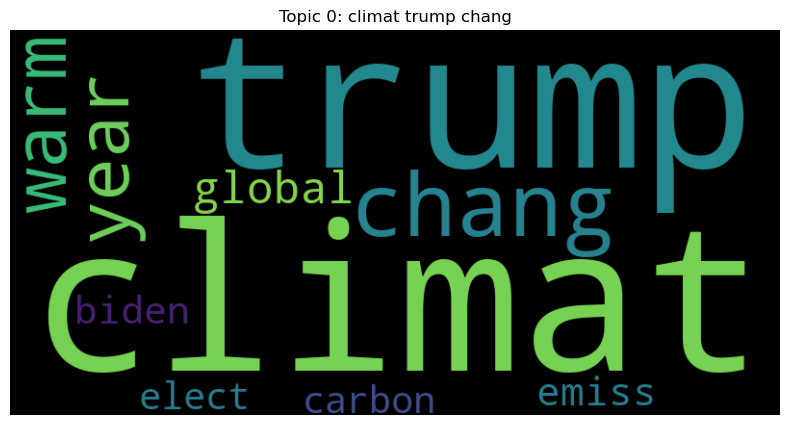

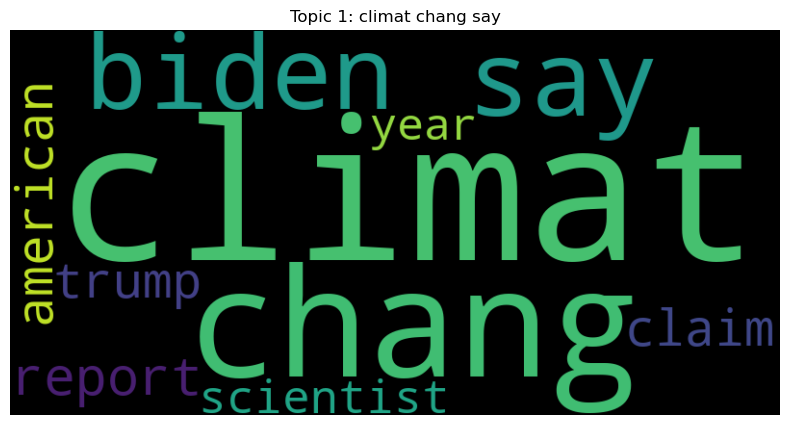

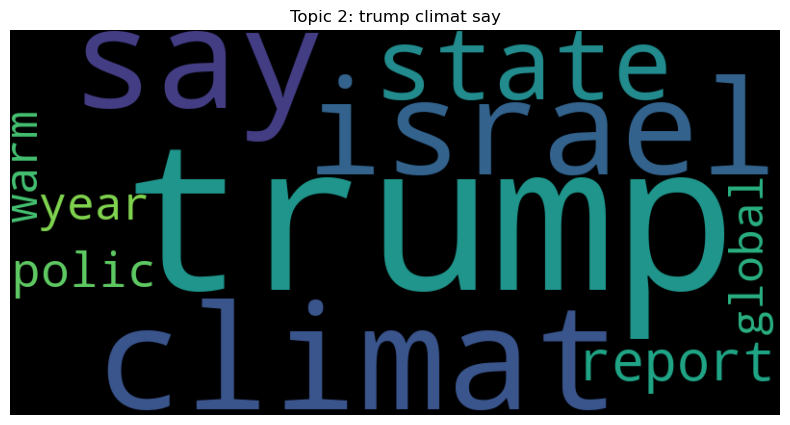

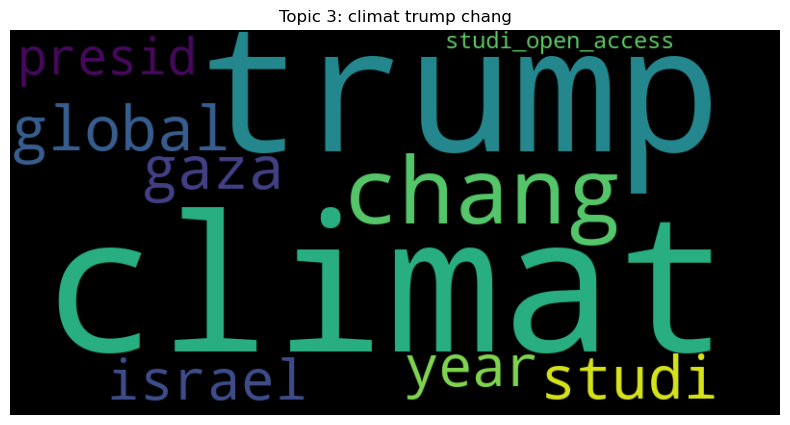

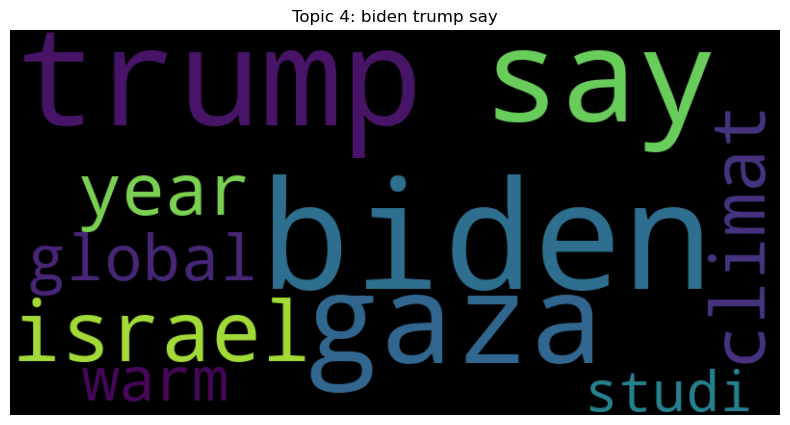

In [25]:
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 5: Generate automatic topic names and word clouds
def generate_topic_name(words):
    return ' '.join([word for word, _ in words[:3]])

topic_words = lda_model.show_topics(formatted=False)

# Create a dictionary to store topic names
topic_names = {i: generate_topic_name(words) for i, words in topic_words}

# Print topics with generated names
for idx, words in topic_words:
    topic_name = topic_names.get(idx, f"Topic {idx}")
    print(f"Topic: {topic_name} \nWords: {[word for word, _ in words]}\n")

# Step 6: Create word clouds for each topic
for idx, words in topic_words:
    word_freq = {word: freq for word, freq in words}
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {idx}: {topic_names[idx]}")
    plt.show()

In [26]:
#!pip install pyLDAvis

In [27]:
import pyLDAvis
import pyLDAvis.gensim

### 2.4.5) Visualize the topics-keywords

Using the pyLDAvis package to display in bubbles format similar to Tweeter and NY Times

In [28]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictonary, mds="mmds", R=30)
vis

C:\Users\darli\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.056106 -0.067501       1        1  22.299123
2     -0.010349  0.082138       2        1  21.934200
0     -0.047486 -0.090773       3        1  20.452594
4     -0.101132  0.026939       4        1  20.199512
1      0.102861  0.049197       5        1  15.114571, topic_info=          Term         Freq        Total Category  logprob  loglift
291      chang   772.000000   772.000000  Default  30.0000  30.0000
292     climat  1295.000000  1295.000000  Default  29.0000  29.0000
506      biden   595.000000   595.000000  Default  28.0000  28.0000
12       trump  1295.000000  1295.000000  Default  27.0000  27.0000
2550      gaza   570.000000   570.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
25       elect    35.294638   275.834338   Topic5  -6.0357  -0.1666
378      state    34.144145   290.144736   Topic5  -6.0688  -0.2503
339       isra    34.437306   338.041311   Topic5  -6.0603  -0.3945
1035    israel    35.680542   613.596199   Topic5  -6.0248  -0.9552
455   research    32.705304   287.221336   Topic5  -6.1119  -0.2832

[461 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2993      5  0.749419  abolish
1787      1  0.065586   accept
1787      2  0.098379   accept
1787      3  0.032793   accept
1787      4  0.787035   accept
...     ...       ...      ...
1386      1  0.127977     york
1386      2  0.563099     york
1386      3  0.115179     york
1386      4  0.089584     york
1386      5  0.102382     york

[1085 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])

### 2.4.6) How to find the optimal number of topics for LDA?

In here there can be some approachs to find that magic number, in our case we are going to follow the "Coherence Score" maximization 

We are going to create a list with the pairs of topics numbers and coherence per every topic number and finally visually get the best value.

In [29]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    start : Start number of topics
    step : Step size for incrementing the number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

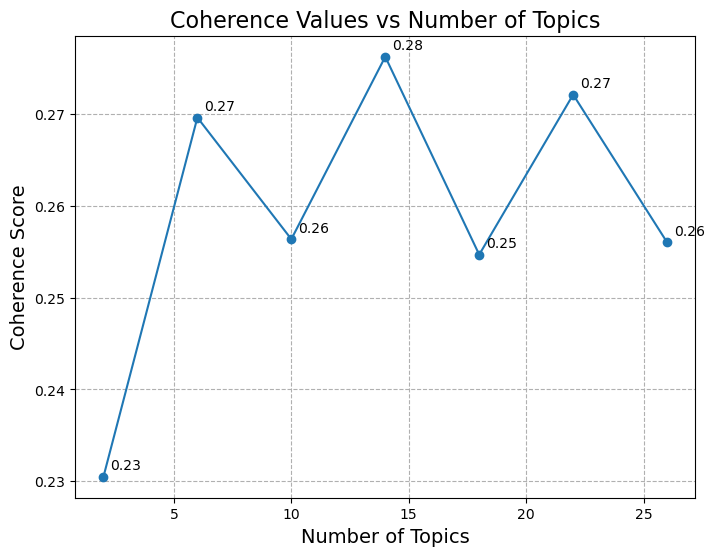


Coherence Score for current model:  0.2828161697693611


In [36]:
# Compute coherence values and create models
model_list, coherence_values = compute_coherence_values(dictionary=dictonary, corpus=corpus, texts=data_bigrams_trigrams, start=2, limit=28, step=4)

# Show graph
x = range(2, 29, 4)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, coherence_values, marker='o')

# Add grid
ax.grid(True, linestyle='--')

# Add data point labels
for i, j in zip(x, coherence_values):
    ax.annotate(str(round(j, 2)), xy=(i, j), xytext=(5, 5), textcoords='offset points')

# Customize plot
ax.set_xlabel("Number of Topics", fontsize=14)
ax.set_ylabel("Coherence Score", fontsize=14)
ax.set_title("Coherence Values vs Number of Topics", fontsize=16)

plt.show()

# Compute Coherence Score for the final model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=dictonary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for current model: ', coherence_lda)



Although the original number of topics is 6, in this case, maybe for the medium dataset we have (more than 10,000 records), the best approach is to work with 14 topics.

### 2.4.7) Make the analysis for the best Model, with 14 topics

In [37]:
lda_model = gensim.models.LdaMulticore(corpus,
                                       num_topics=14,
                                       id2word=dictonary,
                                       passes=2,
                                       workers=2
                                       )

In [38]:
for id, topic in lda_model.print_topics():
  print('Topic: {} \nWords: {}'.format(id, topic))

Topic: 0 
Words: 0.010*"trump" + 0.010*"emiss" + 0.007*"israel" + 0.007*"isra" + 0.007*"gaza" + 0.006*"year" + 0.006*"palestin" + 0.006*"global" + 0.006*"palestinian" + 0.005*"level"
Topic: 1 
Words: 0.019*"trump" + 0.018*"climat" + 0.010*"chang" + 0.009*"global" + 0.009*"report" + 0.007*"say" + 0.007*"israel" + 0.007*"year" + 0.007*"ukrain" + 0.006*"warm"
Topic: 2 
Words: 0.014*"trump" + 0.013*"israel" + 0.011*"say" + 0.010*"year" + 0.007*"american" + 0.006*"gaza" + 0.005*"abort" + 0.005*"find" + 0.005*"biden" + 0.004*"senat"
Topic: 3 
Words: 0.018*"climat" + 0.012*"trump" + 0.010*"chang" + 0.008*"report" + 0.008*"say" + 0.008*"studi" + 0.008*"alito" + 0.006*"biden" + 0.005*"emiss" + 0.005*"show"
Topic: 4 
Words: 0.035*"climat" + 0.028*"chang" + 0.012*"trump" + 0.011*"say" + 0.011*"studi" + 0.010*"global" + 0.009*"year" + 0.008*"warm" + 0.006*"world" + 0.006*"scientist"
Topic: 5 
Words: 0.013*"gaza" + 0.011*"say" + 0.008*"israel" + 0.006*"call" + 0.006*"right" + 0.005*"polic" + 0.005*

In [39]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_bigrams_trigrams, dictionary=dictonary, coherence='c_v')   #c_v is using cosine similarity
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3543307527197898


There is a small increase in Coherence Score than the original 5 topics

In [41]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictonary, mds="mmds", R=30)
vis

C:\Users\darli\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8      0.103819 -0.184798       1        1  9.262374
12    -0.069366  0.047633       2        1  8.695297
4     -0.057911  0.164225       3        1  8.518306
7     -0.171032  0.148799       4        1  8.491804
6      0.137006  0.022895       5        1  7.511008
11     0.034892  0.192785       6        1  7.353868
9     -0.061899 -0.079150       7        1  6.961399
10    -0.048245 -0.173308       8        1  6.761596
13     0.064387  0.090308       9        1  6.430722
3     -0.158110 -0.105143      10        1  6.296721
2      0.051581 -0.104795      11        1  6.250612
5      0.212433  0.049097      12        1  6.084337
0      0.144813 -0.076138      13        1  5.886335
1     -0.182366  0.007590      14        1  5.495620, topic_info=            Term         Freq        Total Category  logprob  loglift
292       climat  1157.000000  1157.000000  Default  30.0000  30.0000
291        chang   692.000000   692.000000  Default  29.0000  29.0000
3715        warm   471.000000   471.000000  Default  28.0000  28.0000
506        biden   614.000000   614.000000  Default  27.0000  27.0000
1035      israel   651.000000   651.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
703    scientist    18.622757   212.080896  Topic14  -5.6633   0.4686
2550        gaza    23.054832   605.926706  Topic14  -5.4498  -0.3677
860         kill    17.474162   213.751920  Topic14  -5.7270   0.3971
25         elect    16.941637   290.601494  Topic14  -5.7579   0.0590
2246  temperatur    16.215096   154.010101  Topic14  -5.8018   0.6501

[1114 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6374     10  0.810992     ablat
539       1  0.060895     abort
539       3  0.085253     abort
539       4  0.024358     abort
539       5  0.024358     abort
...     ...       ...       ...
646       9  0.055007    youtub
646      12  0.055007    youtub
646      13  0.055007    youtub
6430      1  0.748592  zerowast
6561      7  0.804908      ⁸¹kr

[4048 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 13, 5, 8, 7, 12, 10, 11, 14, 4, 3, 6, 1, 2])

### 2.4.8) Bar Diagram showing the top-5 topics for any Reddit handler of your choice

In [45]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt

In [46]:
# Get the topics and their proportions
topics = lda_model.print_topics(-1)

# Sort the topics by proportion in descending order
sorted_topics = sorted(topics, key=lambda x: x[1], reverse=True)

# Get the top 5 topics
top_topics = sorted_topics[:5]

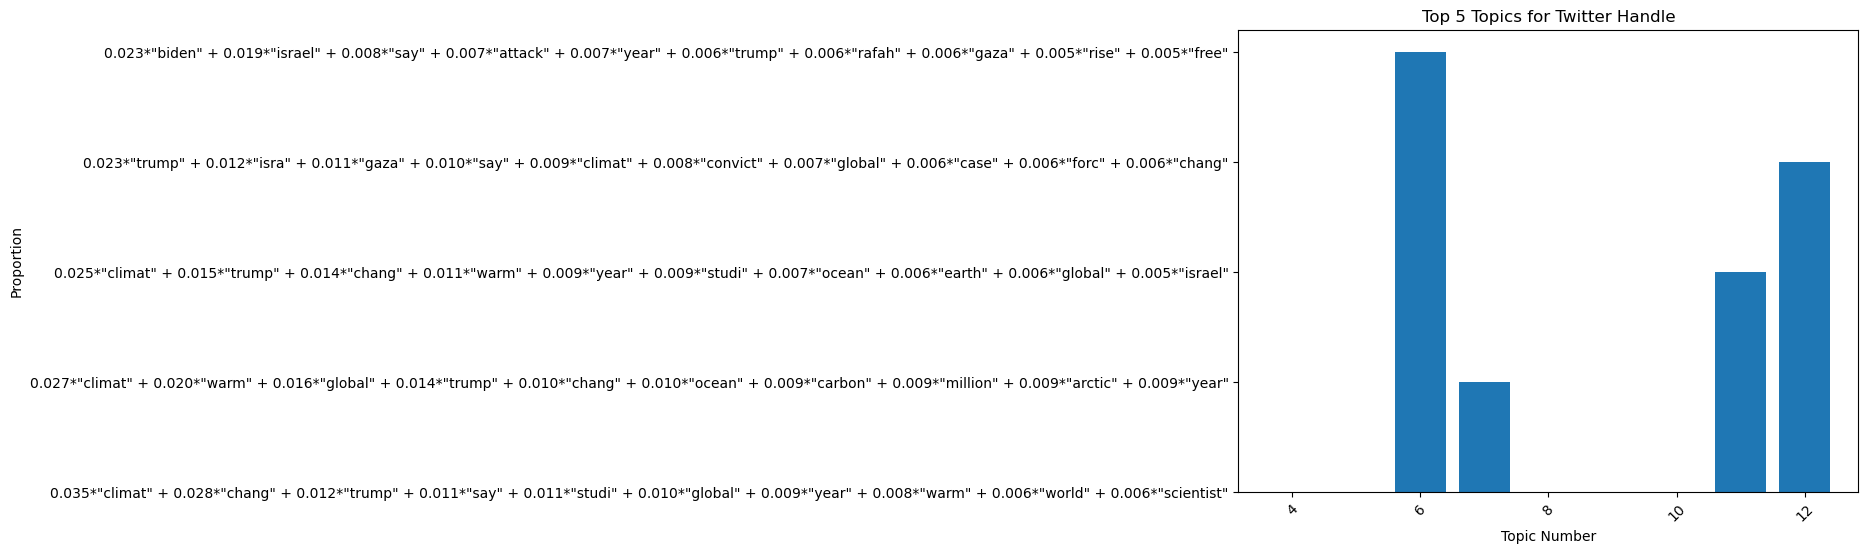

In [47]:
# Create lists for topic numbers and proportions
topic_nums = []
topic_props = []

for topic in top_topics:
    topic_num, prop = topic
    topic_nums.append(topic_num)
    topic_props.append(prop)

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(topic_nums, topic_props)
ax.set_xlabel('Topic Number')
ax.set_ylabel('Proportion')
ax.set_title('Top 5 Topics for Twitter Handle')
plt.xticks(rotation=45)
plt.show()

With that, we could identify the five most prevalent topics: Topic 6, Topic 12, Topic 11, and Topic 7. Being the Topic 6 is the most important one

By examining the top words associated with the top 5 topics, we could understand and interpret the semantic content and meaning of the identified topics

So imagine if our company wants to point some message to this audience; we can redirect our message with content oriented to those 5 topics to have the best-targeted message. 

This 5 topics can also summarize at a high level this corpus